In [1]:
%matplotlib inline

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='tflite_models/DenseNet_trigo_croped.tflite')
interpreter.allocate_tensors()

In [4]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

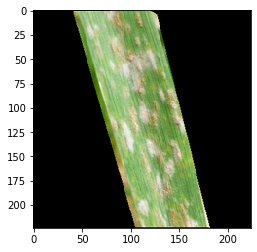

In [5]:
IMAGE_SHAPE = (224 , 224)
path  = './dataset/trigo/croped_test/oidio/27_0.png'
# path = './dataset/trigo/test.png'
image = Image.open(path)
#image image.convert('RGB')
image = image.resize(IMAGE_SHAPE, Image.ANTIALIAS).convert('RGB')
plt.imshow(image)

(1.0, (1, 224, 224, 3))

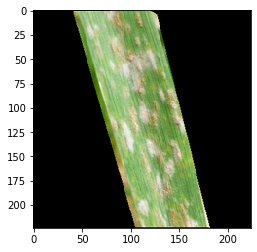

In [6]:
img_arr = np.array(image, dtype=np.float32)/255
#img_arr = np.resize(img_arr, IMAGE_SHAPE)
plt.imshow(img_arr)
img_arr  =np.expand_dims(img_arr, 0)
np.amax(img_arr), img_arr.shape

In [7]:
# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = img_arr
interpreter.set_tensor(input_details[0]['index'], input_data)

In [8]:
interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[2.3802373e-05 1.2982779e-03 9.9867332e-01 4.6062632e-06]]


In [9]:
np.argmax(output_data)

2

In [10]:
input_details

[{'name': 'densenet121_input',
  'index': 1,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [11]:
output_details

[{'name': 'Identity',
  'index': 0,
  'shape': array([1, 4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [12]:
['roya', 'mancha_foliar', 'oidio', 'sano']

['roya', 'mancha_foliar', 'oidio', 'sano']

In [15]:
np.float32.

<attribute 'size' of 'numpy.generic' objects>